### 3. Implement Quantum Teleportation algorithm in Python
https://www.geeksforgeeks.org/quantum-teleportation-in-python/

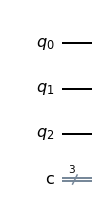

In [2]:
from qiskit import *
 
circuit = QuantumCircuit(3, 3)
%matplotlib inline
 
# Whenever during any point of the program we
# want to see how our circuit looks like,
# this is what we will be doing.
circuit.draw(output='mpl', style="iqp")

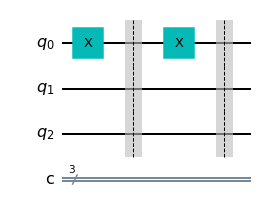

In [4]:
circuit.x(0)  # used to apply an X gate.
 
# This is done to make the circuit look more
# organized and clear.
circuit.barrier()
circuit.draw(output='mpl')

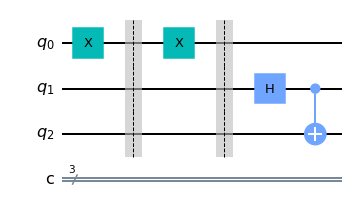

In [5]:
# This is how we apply a Hadamard gate on Q1.
circuit.h(1)
 
# This is the CX gate, which takes two parameters,
# one being the control qubit and the
# other being the target qubit.
circuit.cx(1, 2)
circuit.draw(output='mpl')

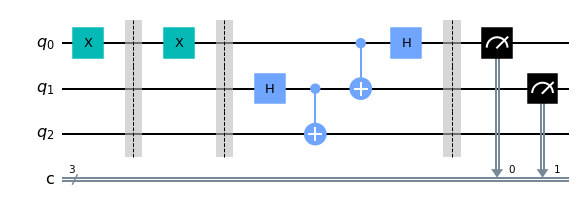

In [6]:
# The next step is to create a controlled
# gate between qubit 0 and qubit 1.
# Also we will be applying a Hadamard gate to q0.
circuit.cx(0, 1)
circuit.h(0)
 
# Done for clarification of the circuit again.
circuit.barrier()
 
# the next step is to do the two measurements
# on q0 and q1.
circuit.measure([0, 1], [0, 1])
 
# circuit.measure can take any number of arguments,
# and has the following parameters:
# [qubit whose value is to be measured,
# classical bit where the value is stored]
circuit.draw(output='mpl')

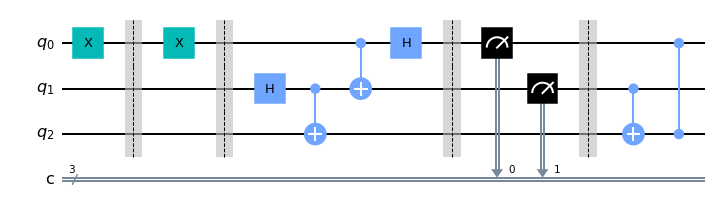

In [7]:
circuit.barrier()
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.draw(output='mpl')

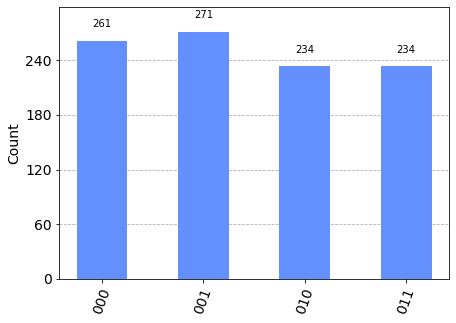

In [8]:
# The first step is to call a simulator
# which we will use to perform simulations.
from qiskit.tools.visualization import plot_histogram
sim = Aer.get_backend('qasm_simulator')
 
# here, like before, we have given the
# classical bit 2 the value of the Quantum bit 2.
circuit.measure(2, 2)
 
# Now, we run the execute function,
# which takes our quantum circuit,
# the backend which we are using and
# the number of shots we want
# (shots are to increase accuracy and
# mitigate errors in Quantum Computing).
# All of this is stored in a variable called result
 
result = execute(circuit, backend=sim, shots=1000).result()
counts = result.get_counts()
 
# This counts variable shows that for each possible combination,
# how many times the circuit gave a similar output
# (for example, 111 came x times, 101 came y times etc.)
 
# importing plot_histogram which will help us visualize the results.
plot_histogram(counts)